# Ames Housing Sale Price Analysis

Scharmaine Chappell

## Executive Summary

In this analysis, I will be analyzing the houseing sales prices of Ames, Iowa. 

## The Data

Our dataset comes from the 2006 to 2010 for Housing in Ames, Iowa. Each house is represented by a row of the dataset.

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline


file_path = "https://github.com/learn-co-curriculum/da-phase1-project-enterprise/raw/main/data/ames.csv"
df = pd.read_csv(file_path, index_col=0)

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [14]:
df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Distribution of `SalePrice`

In [15]:
df['SalePrice'].index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460],
           dtype='int64', name='Id', length=1460)

<AxesSubplot:xlabel='Id'>

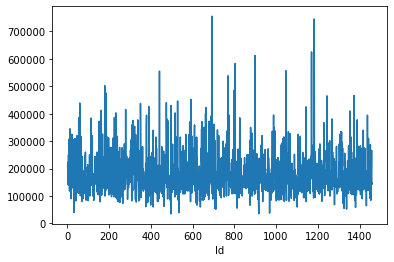

In [16]:
df['SalePrice'].plot()


<AxesSubplot:ylabel='Frequency'>

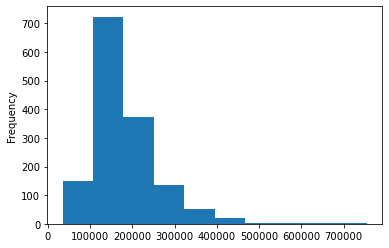

In [17]:
df['SalePrice'].plot.hist()



Text(0.5, 1.0, 'Distribution of SalePrice')

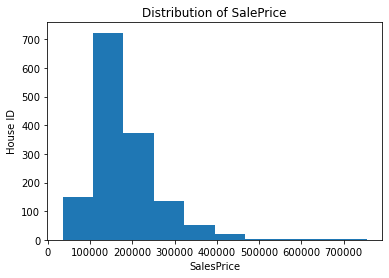

In [18]:
fig, ax = plt.subplots()

x = df['SalePrice']

ax.hist(x)
    
ax.set_xlabel('SalesPrice')
ax.set_ylabel('House ID')
ax.set_title('Distribution of SalePrice')

In [19]:
df['SalePrice'].mode()

0    140000
dtype: int64

In [20]:
df['SalePrice'].mean()

180921.19589041095

In [21]:

df['SalePrice'].median()


163000.0

Except for a couple outliers, most of the homes were selling for within the $125,000 #$175,000  price range. skew to hte positive?

## Differences between Subsets

I am creating a special grouping, subset,
of the price the homes sold for, 'SalePrice' and the number of above ground rooms, not including bathrooms. This is represented by the column, 'TotRmsAbvGrd'.

In [22]:
df['TotRmsAbvGrd'].value_counts()


6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64

In [23]:
df['TotRmsAbvGrd'].head()


Id
1    8
2    6
3    6
4    7
5    9
Name: TotRmsAbvGrd, dtype: int64

Here we display the subset of 'SalePrice' and TotRmsAbvGrd'

In [24]:
Price_TotRms = df[['SalePrice', 'TotRmsAbvGrd']]

Price_TotRms.head()

,SalePrice,TotRmsAbvGrd
Id,,
1,208500,8
2,181500,6
3,223500,6
4,140000,7
5,250000,9


<AxesSubplot:ylabel='Frequency'>

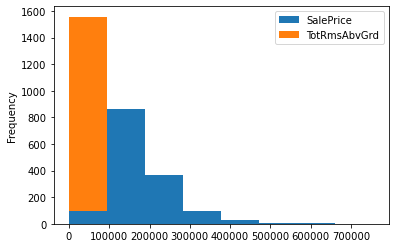

In [25]:
Price_TotRms.plot.hist(stacked=True, bins=8)

    Here we show how 'SalePrice' is affected by the 'TotRmsAbvGrd'. This shows where the two figures overlap within the $100,00 price range and then becomes less of a factor as the price goes up. Remember this does not include bathrooms, nor the square footage of the rooms.

## Correlation between 'TotRmsAbvGrd' and `SalePrice`

In [27]:
correlation = Price_TotRms.corr()
print(correlation)

              SalePrice  TotRmsAbvGrd
SalePrice      1.000000      0.533723
TotRmsAbvGrd   0.533723      1.000000


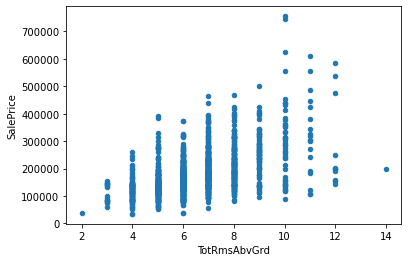

In [28]:
df.plot('TotRmsAbvGrd', 'SalePrice', kind='scatter');


From our scatter plot and the correlative calculation we can see that the number of above ground rooms counts for approximately half of the impact on the sale price. However, we also see, this peaks when the 'TotRmsAbvGrd' becomes 10 at above 700,000 After 10, the price is bound to be closer to those in the 600,000 and below range. We do have a few more outliers, but it the data skews more towards the negative side.

## Engineered Feature: 'TotBath'
Our new feature, 'TotBath' represents the total number of rooms considered bathrooms, no matter the size or location, in the home.

In [29]:
df_Bsmnt =df['BsmtFullBath'] + df['BsmtHalfBath']
df_NotBsmt = df['FullBath'] + df['HalfBath']
df['TotBath'] = df_Bsmnt + df_NotBsmt
print(df['TotBath'])

Id
1       4
2       3
3       4
4       2
5       4
       ..
1456    3
1457    3
1458    2
1459    2
1460    3
Name: TotBath, Length: 1460, dtype: int64


In [44]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Displaying our engineered feature, 'TotBath' with comparison to our 'SalePrice' as well. We get some interesting results as well. 

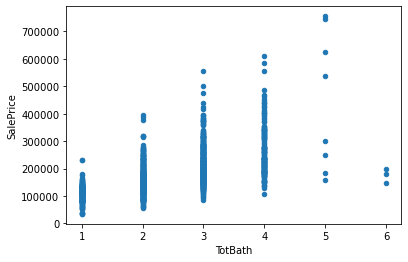

In [34]:
df.plot('TotBath', 'SalePrice', kind='scatter');


In [37]:
print(df['TotBath'])


Id
1       4
2       3
3       4
4       2
5       4
       ..
1456    3
1457    3
1458    2
1459    2
1460    3
Name: TotBath, Length: 1460, dtype: int64


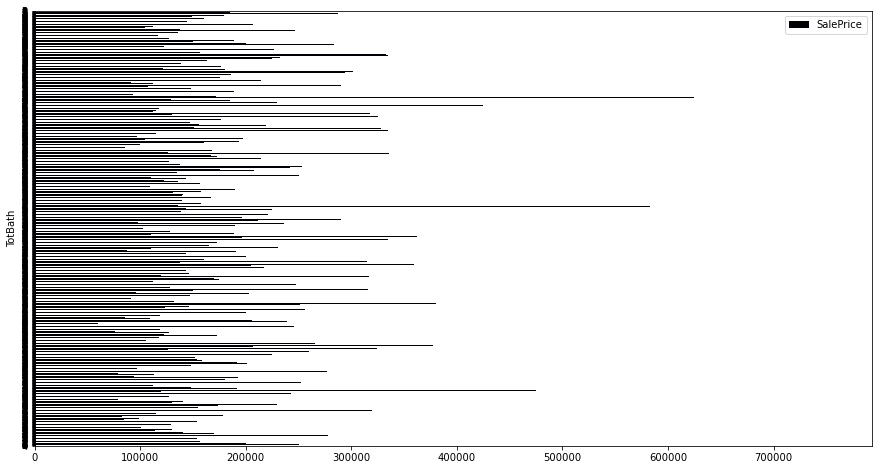

In [42]:
df.plot('TotBath', 'SalePrice', kind='barh', figsize = (15,8), stacked = True, colormap = 'inferno');

Here we are able to see how much the number of bathrooms in a home can effect the end price the public is willing to pay for their home. In most cases, no matter how many there are, the 400,000 or less price range is visually the most frequent.